# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Reading and Exploration

In [3]:
df=pd.read_csv(r'C:\Users\atewa\OneDrive\Desktop\DA_Projects\Netflix title\netflix_titles.csv')

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Dealing with missing data

In [10]:
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)

In [11]:
df['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [12]:
df['duration'].mode()

0    1 Season
Name: duration, dtype: object

In [13]:
df['date_added'].fillna('Not Available',inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['duration'].fillna(df['duration'].mode()[0],inplace=True)


It's appropiate to replace the unknown values of the rating section with the most frequent rating, same as well for the duartion.

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
""" Some movies' years extraction are wrong like "Dick Johnson Is Dead" which was released
in 2021 but extractted as 2020, we'll create our own.
"""
def extract_year(year):
    return year[-4:]

df['release_year']=df['date_added'].apply(extract_year)

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2021,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Analysis and Visualizations

In [16]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Text(0.5, 1.0, "Distribution of content's type.")

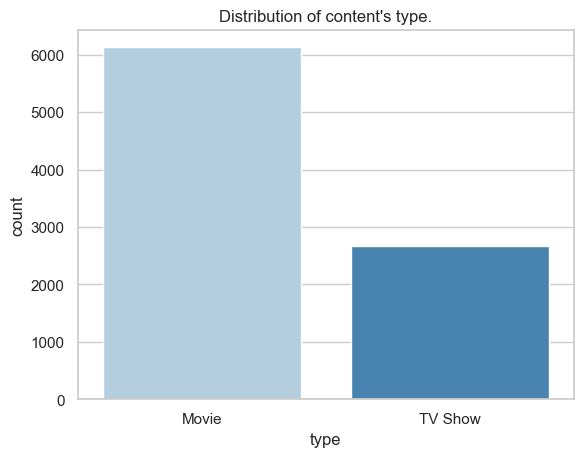

In [22]:
#Distribution of content's type.
sns.set(style="whitegrid")
sns.countplot(x='type',data=df,palette='Blues')
plt.title("Distribution of content's type.")

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df.groupby(['type']).count()['show_id']

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

Text(0.5, 1.0, "Distribution of content's rating.")

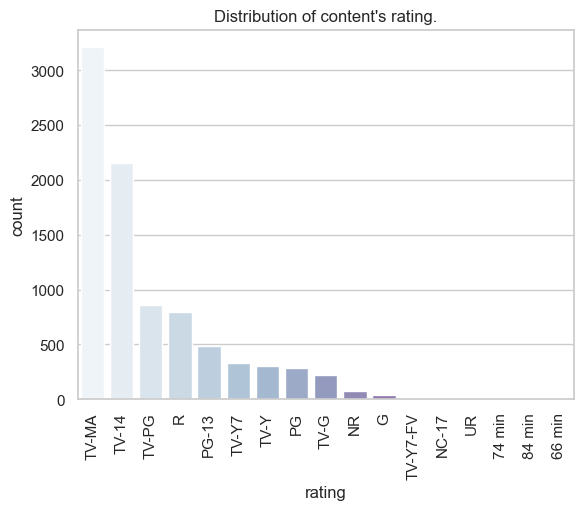

In [28]:
#Distribution of content's rating.
order_count=df['rating'].value_counts().index
sns.countplot(x='rating',data=df,order=order_count,palette='BuPu')
plt.xticks(rotation=90)
plt.title("Distribution of content's rating.")

In [29]:
#Categorized by type of content
df.groupby(['type','rating']).count()['show_id']

type     rating  
Movie    66 min         1
         74 min         1
         84 min         1
         G             41
         NC-17          3
         NR            75
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2064
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             5
         R              2
         TV-14        733
         TV-G          94
         TV-MA       1147
         TV-PG        323
         TV-Y         176
         TV-Y7        195
         TV-Y7-FV       1
Name: show_id, dtype: int64

In [32]:
df['country'].value_counts().head(10).reset_index()

,country,count
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [33]:
index_labels = df['country'].value_counts().head(10).index
index_labels

Index(['United States', 'India', 'Unknown', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object', name='country')

Text(0.5, 1.0, 'Top 10 countries producing content.')

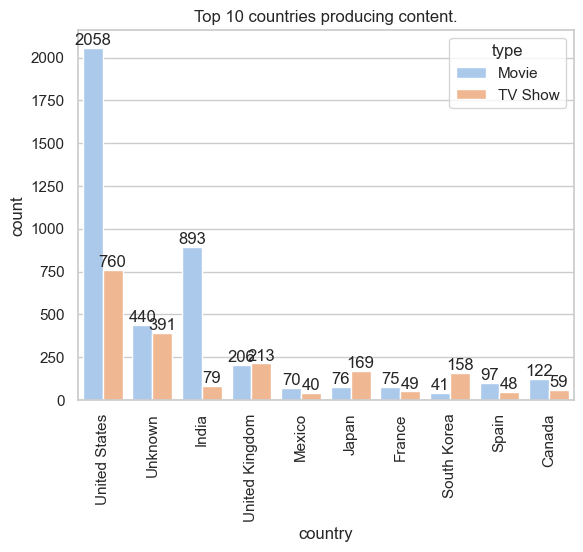

In [34]:
#Top 10 countries producing content based on type.
index_labels = list(df['country'].value_counts().head(10).index)


top_10_countries_df=df[df['country'].isin(index_labels)]

bar=sns.countplot(x='country',data=top_10_countries_df, palette='pastel',hue='type')
for i in bar.containers:
    bar.bar_label(i)

plt.xticks(rotation=90)
plt.title("Top 10 countries producing content.")

In [35]:
df['release_year'].nunique()

15

Text(0.5, 1.0, 'Years with most produced content.')

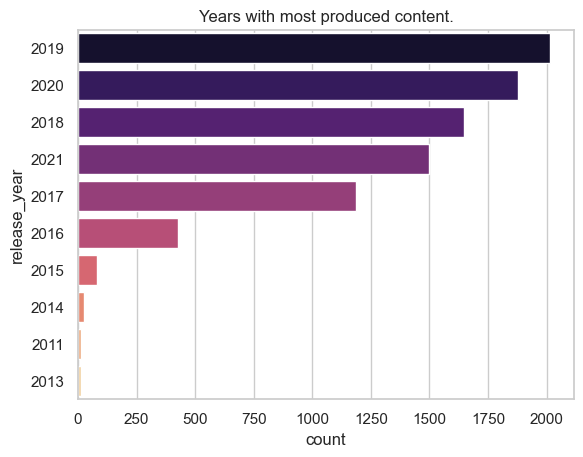

In [36]:
#Years with most produced content.
new_data=df['release_year'].value_counts().nlargest(10).reset_index()

sns.barplot(y='release_year',x='count',data=new_data,palette='magma')
plt.title("Years with most produced content.")

(0.0, 25.0)

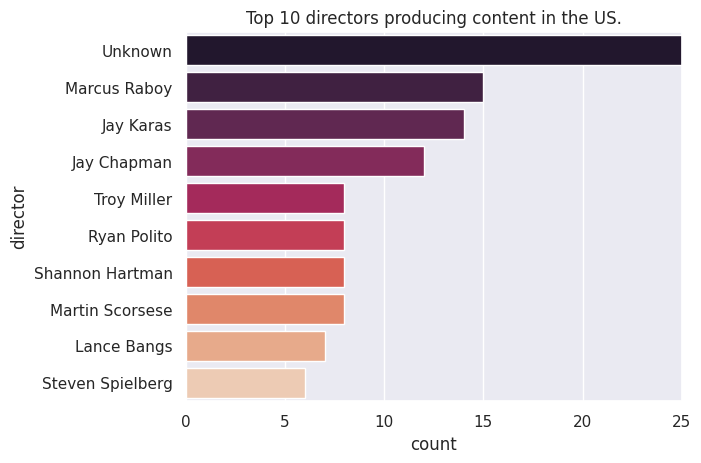

In [ ]:
#Top 10 US direcotrs with most content.
us_data=df[df['country']=='United States']
us_data=us_data['director'].value_counts().nlargest(10).reset_index()

sns.barplot(y='director',x='count',data=us_data,palette='rocket')
plt.title("Top 10 directors producing content in the US.")
plt.xlim(0,25)

<Axes: title={'center': 'Content Release Trend Over Years'}, xlabel='release_year'>

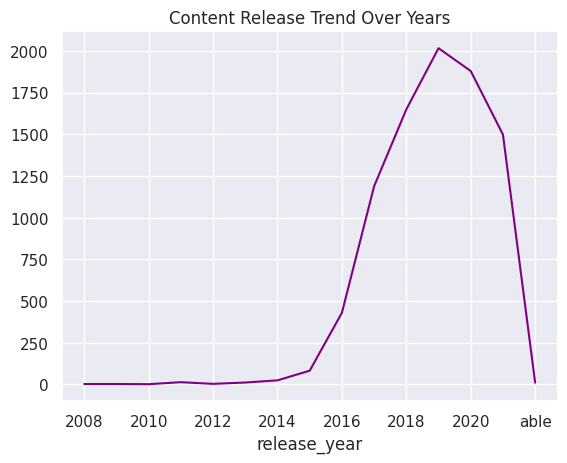

In [ ]:
#Content relase trend over time.
df['release_year'].value_counts().sort_index().plot(kind='line', title="Content Release Trend Over Years",color='Purple')

Text(0.5, 1.0, 'Top 10 categories on Netflix')

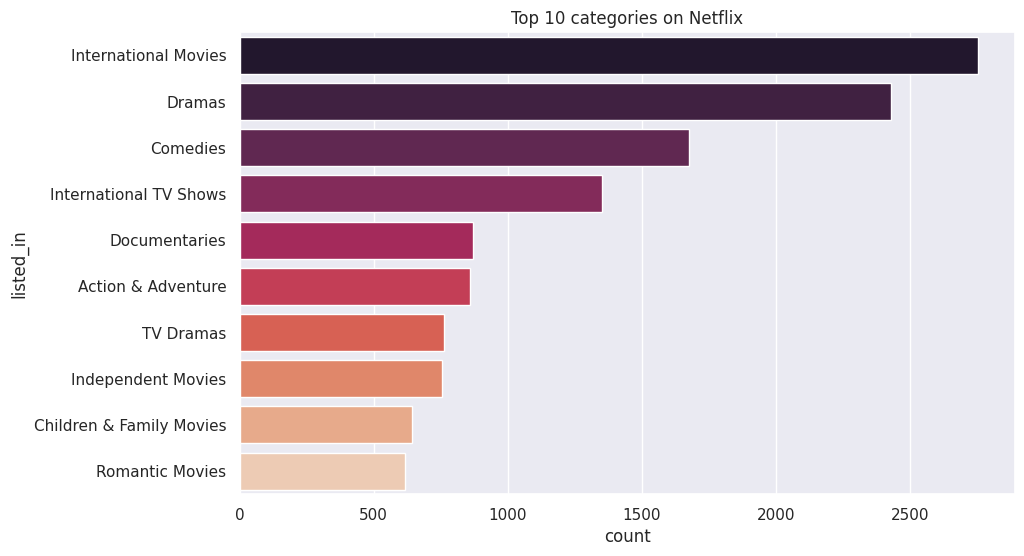

In [ ]:
#Top 10 categories over the platform.
category_counts = df['listed_in'].dropna().str.split(', ').explode().value_counts().head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(y='listed_in',x='count',data=category_counts,palette='rocket')
plt.title("Top 10 categories on Netflix")

In [39]:
df.to_csv('netflix_titles.csv')